In [1]:

from backtester_lib.strategy_tester import StrategyTester
from backtester_lib.assets.holding import Holding
from backtester_lib.ticker import Ticker
from backtester_lib.utils import open_pricing

In [2]:
# Parameters
from datetime import datetime
data_csv = "./data/btcData1d.csv"
data_time_periods = '4hr'
start_date = datetime(2019, 9, 1)
end_date = datetime(2019, 11, 1)

In [3]:
# Ticker is a wrapper around a dataframe. Contains data on the asset we are interested in
ticker = Ticker("ticker", data_csv, data_time_periods)

In [4]:

# Holding is a object that contains information on realting to trading: ticker we are trading on, fees, starting balances, etc
holding = Holding(ticker)

In [5]:
# A Strategy is a class that tells the strategy tester how to trade. All strategies should inhereit from the Strategy base class to implement 2 functions.
# The first is to setup the dataframe it is working on with any relevant data, typically various indicators like RSI, MA, Bollinger Bands.
# The second is a method to generate a buy or sell signal.
# This buy and hold strategy implments buying and holding.
from backtester_lib.strategies.buy_and_hold import BuyAndHold
test_strat = BuyAndHold()


In [6]:
# The strategy tester takes in test name, a strategy, and a holding to operate on.
# The strategy tester object can then run tests using various parametsrs like start and end dates and pricing functions. 
# Opne pricing just gets teh open column from a pandas row. 
# The tests runs row buy on the data frame. The process is like this: 
# setup dataframe -> generate transactions -> simulate the transactions with the holding -> compose results into a dataframe and TestResult Object ->  reinitilize holding back to its initial state
test_name = "buy_and_hold_test"
test, test_result = StrategyTester(
    "buy_and_hold", test_strat, holding
).run_test(
    name=test_name,
    start_date=start_date,
    end_date=end_date,
    buy_pricing_function=open_pricing,
    sell_pricing_function=open_pricing,
)


In [7]:
# the data frame contains extra columns realting to the strategy. Usually these are the type of transcation, how much to trade, and the portfolio value at the end
test

,time,open,high,low,close,transaction,percent_to_trade,buy_and_hold_test
date,,,,,,,,
2019-09-01,1567296000,9600.86,9840.00,9539.58,9766.52,buy,1,1075.904861
2019-09-02,1567382400,9766.62,10486.77,9756.54,10381.26,,1,1101.526529
2019-09-03,1567468800,10381.26,10790.00,10280.00,10628.48,,1,1096.692799
2019-09-04,1567555200,10628.48,10833.14,10380.00,10581.84,,1,1095.955925
2019-09-05,1567641600,10581.84,10666.43,10452.15,10574.73,,1,1068.407605
...,...,...,...,...,...,...,...,...
2019-10-28,1572220800,9555.89,9939.69,9180.59,9226.50,,1,977.400003
2019-10-29,1572307200,9225.06,9575.00,9068.19,9430.80,,1,949.794682
2019-10-30,1572393600,9431.36,9431.36,8991.33,9164.44,,1,949.280632


In [8]:
# Use the test name to retrieve the portfolio value column in the dataframe.
test[test_name]

date
2019-09-01    1075.904861
2019-09-02    1101.526529
2019-09-03    1096.692799
2019-09-04    1095.955925
2019-09-05    1068.407605
                 ...     
2019-10-28     977.400003
2019-10-29     949.794682
2019-10-30     949.280632
2019-10-31     958.985401
2019-11-01     958.985401
Name: buy_and_hold_test, Length: 62, dtype: float64

In [9]:
# You can also just get the end results of the test by using the TestResult object
print(vars(test_result))

{'name': 'buy_and_hold_test', 'data_source': 'ticker', 'start_date': Timestamp('2019-09-01 00:00:00'), 'end_date': Timestamp('2019-11-01 00:00:00'), 'num_buys': 1, 'num_sells': 0, 'start_balance': 1075.9048606373292, 'end_balance': 958.9854010072461}


In [10]:
# The TestResult Object also has some useful property methods too
print("ROI",test_result.return_on_investment)
print("Annualized ROI", test_result.annualized_return_on_investment)

ROI -0.10867081645195285
Annualized ROI -0.6506887821159965


<Axes: xlabel='date'>

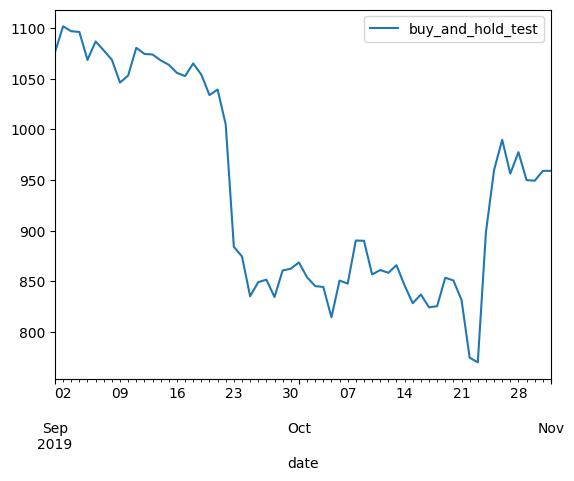

In [11]:
# Below is a simple way to graph multiple tests
import pandas

tests = [
    test,
    # add more test dataframes here
]

# Gets the last column of the test data frames.
# The last column should be portfolio value
tests_series = [x.iloc[:, -1] for x in tests]
pandas.DataFrame(tests_series).T.plot()

<Axes: xlabel='date'>

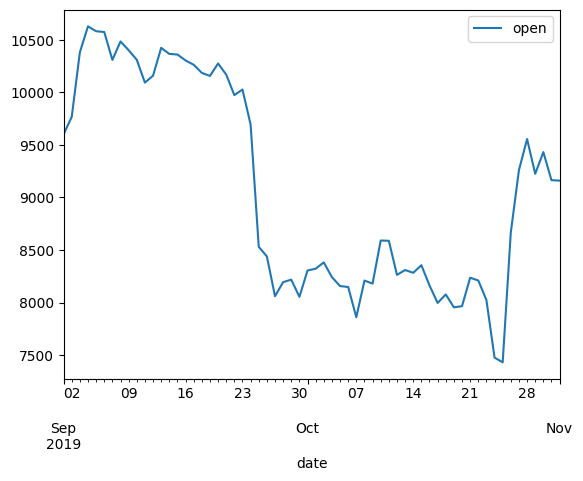

In [12]:
# Sometimes its useful to plot the base assests price too for comparision.
ticker.dataframe[start_date:end_date].plot(y=["open"])